# **Studi Kasus Diabetic Retinopathy Part 2**

Implementasi dengan Menggunakan Model `Bagging Classifier` , `Random forest` dan `Stacking clasifier`

## Membaca data

In [89]:
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

data = arff.loadarff('/content/drive/MyDrive/datamining/tugas/messidor_features.arff')
df = pd.DataFrame(data[0])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


### Label Encoder

In [90]:
y = df['Class'].values
y[0:5]

array([b'0', b'0', b'1', b'0', b'1'], dtype=object)

In [91]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
y

array([0, 0, 1, ..., 0, 1, 0])

### Mengubah Colom

In [92]:
col_names = []
for i in range(20):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('euDist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')
df.columns = [col_names]
df['label'] = y
df

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class,label
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,0
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,0
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,0
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,1


In [93]:
X = df.drop(columns=['label'])
X

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0


## Preprocessing Data (`Min-Max`)

In [94]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
features_names = X.columns.copy()
scaled_features = pd.DataFrame(scaled, columns=features_names)
scaled_features.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class
0,1.0,1.0,0.140000,0.160305,0.176471,0.173077,0.177083,0.147727,0.122764,0.106359,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.530801,0.261133,1.0
1,1.0,1.0,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.142126,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.682302,0.536341,0.0
2,1.0,1.0,0.406667,0.450382,0.487395,0.509615,0.479167,0.363636,0.137472,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.726836,0.437973,0.0
3,1.0,1.0,0.360000,0.396947,0.436975,0.471154,0.437500,0.340909,0.099403,0.110368,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.514678,0.352675,0.0
4,1.0,1.0,0.286667,0.328244,0.361345,0.384615,0.395833,0.295455,0.043799,0.051281,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.481936,0.407122,0.0
5,1.0,1.0,0.286667,0.320611,0.336134,0.384615,0.375000,0.318182,0.069395,0.041498,0.021738,0.005417,0.000000,0.000000,0.000000,0.000000,0.601764,0.426770,0.0
6,1.0,0.0,0.186667,0.213740,0.235294,0.250000,0.250000,0.170455,0.037412,0.054531,0.015400,0.000000,0.000000,0.000000,0.000000,0.000000,0.775126,0.506339,0.0
7,1.0,1.0,0.033333,0.038168,0.042017,0.048077,0.010417,0.000000,0.050374,0.056828,0.011536,0.002516,0.000000,0.000000,0.000000,0.000000,0.929166,0.081622,1.0
8,1.0,1.0,0.140000,0.152672,0.142857,0.134615,0.125000,0.102273,0.164381,0.140880,0.057991,0.008305,0.000000,0.000000,0.000000,0.000000,0.589477,0.365093,0.0
9,1.0,1.0,0.520000,0.564885,0.605042,0.673077,0.656250,0.522727,0.053997,0.060159,0.008246,0.001670,0.000455,0.000000,0.000000,0.000000,0.860738,0.317608,0.0


### Split Data

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(scaled_features, y, test_size=0.2, random_state=40)


## Eksekusi Pada Model `Bagging Clasifier`

### Bagging Clasifier Dengan SVC

Mencari akurasi tertinggi dengan N_estimators dari 2 sampai 100

In [96]:
# import model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
# eksekusi data pada model
X, y = make_classification(n_samples=100, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
# bagging clasifier menggunakan SVC dan Gaussian(naive bayes)
# # SVC
n_estimator = range(2,101)
akurasi_bags_1 = []
for n in n_estimator:
  # inisialisasi model
  clf = BaggingClassifier(base_estimator=SVC(),
                          n_estimators=n, random_state=40).fit(X_train, y_train)
  # predict x_test
  y_pred = clf.predict(X_test)
  # akurasi count
  akurasi_bags_1.append(accuracy_score(y_test,y_pred))

  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Visualisasi Akurasi Bagging dengan SVC

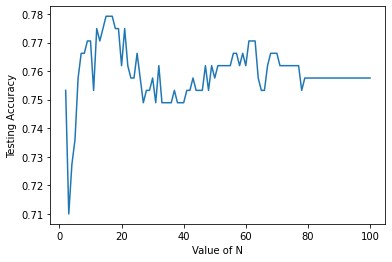

In [97]:
import matplotlib.pyplot as plt
plt.plot(n_estimator,akurasi_bags_1)
plt.xlabel('Value of N')
plt.ylabel('Testing Accuracy')
plt.show()

Mencari n_estimator dengan Akurasi Tertinggi

In [98]:
akurasi_bags_1.index(max(akurasi_bags_1))+1 , max(akurasi_bags_1)

(14, 0.7792207792207793)

### Bagging Clasifier Dengan GaussianNB

Mencari akurasi tertinggi dengan N_estimators dari 2 sampai 100

In [99]:
akurasi_bags_2= []
for n in n_estimator:
  # inisialisasi model
  clf2 = BaggingClassifier(base_estimator=GaussianNB(),
                          n_estimators=n, random_state=40).fit(X_train, y_train)
  # predict x_test
  y_pred2 = clf2.predict(X_test)
  # akurasi count
  akurasi_bags_2.append(accuracy_score(y_test,y_pred2))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Visualisasi Hasil Akurasi 

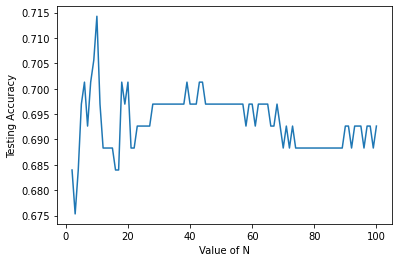

In [100]:
plt.plot(n_estimator,akurasi_bags_2)
plt.xlabel('Value of N')
plt.ylabel('Testing Accuracy')
plt.show()

Mencari Akurasi Tertinggi

In [101]:
akurasi_bags_2.index(max(akurasi_bags_2))+1 , max(akurasi_bags_2)

(9, 0.7142857142857143)

## Eksekusi Pada Model `Random Forest`

Mencari akurasi tertinggi dengan N_estimators dari 2 sampai 100

In [103]:
from sklearn.ensemble import RandomForestClassifier
akurasirf= []
for n in n_estimator:
  # inisialisasi model
  rf = RandomForestClassifier(
                          n_estimators=n,max_depth=2, random_state=40).fit(X_train, y_train)
  # predict x_test
  y_predrf = rf.predict(X_test)
  # akurasi count
  akurasirf.append(accuracy_score(y_test,y_predrf))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Visualisasi Hasil Akurasi 

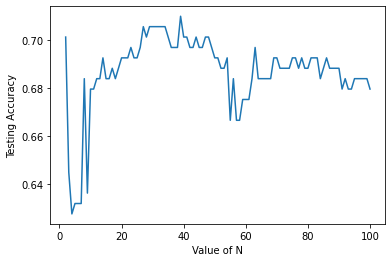

In [104]:
plt.plot(n_estimator,akurasirf)
plt.xlabel('Value of N')
plt.ylabel('Testing Accuracy')
plt.show()

Mencari Akurasi Tertinggi dari N

In [105]:
akurasirf.index(max(akurasirf))+1 , max(akurasirf)

(38, 0.70995670995671)

## Eksekusi Pada Model `Stacking clasifier`

In [125]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# estimator menggunakan Random Forest, SVC GaussianNB
## untuk n_estimators menggunakan n dengan akurasi tertinggi 
estimators = [
    ('rf', RandomForestClassifier(n_estimators=38, max_depth=2, random_state=40)),
    ('svc', SVC()),
     ('gnb', GaussianNB()),
     ('bagsvc', BaggingClassifier(base_estimator=SVC(),
                          n_estimators=14, random_state=40)),
    ('baggnb' ,BaggingClassifier(base_estimator=GaussianNB(),
                          n_estimators=9, random_state=40))
]

sc = StackingClassifier(
      estimators=estimators, final_estimator=SVC()).fit(X_train, y_train)

y_predsc = sc.predict(X_test)
akurasi = accuracy_score(y_test,y_predsc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

### Hasil Akurasi Dan Score dari Stacking Clasifier

In [126]:
print(f'Akurasi Untuk Stacking Clasifier =  {akurasi}')

Akurasi Untuk Stacking Clasifier =  0.7748917748917749
